# James Cook University Singapore
# Information Processing and Visualisation

# Import Libraries  

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi 
import matplotlib.pyplot as plt

# Import Data

In [ ]:
bottle = pd.read_csv('bottle.csv', low_memory=False)
pd.set_option('display.float_format', lambda x:'%f'%x)
bottle.head(10);

# Data management 

In [ ]:
# The two variables used will be depth and phosphate concentration.
bottle["Depthm"] = pd.to_numeric(bottle["Depthm"])
bottle["PO4uM"] = pd.to_numeric(bottle["PO4uM"])

C:\Users\111\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


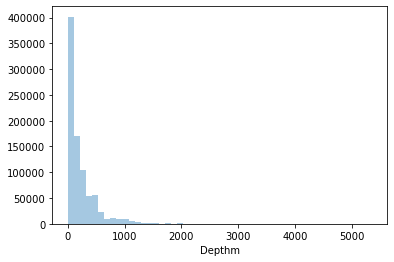

In [ ]:
# Initial histogram of depth.
sns.distplot(bottle["Depthm"], kde=False);

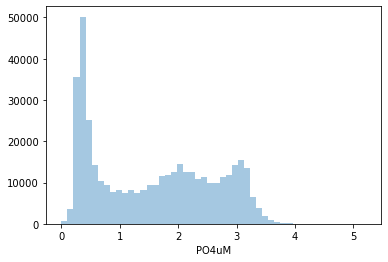

In [ ]:
# Histogram of phosphate concentration.
sns.distplot(bottle["PO4uM"], kde=False);

In [ ]:
# Obtain a subset limited to 1000m as there are very few values for depth beyond this point.
sub1 = bottle[(bottle["Depthm"] < 1000)].copy()

C:\Users\111\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


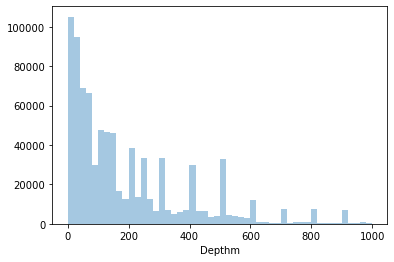

In [ ]:
# Distplot after limiting.
sns.distplot(sub1["Depthm"], kde=False);

In [ ]:
# Split depth into 3 categories, shallow, middle, and deep.
sub1["DEPTH_CAT"] = pd.cut(sub1["Depthm"], [0, 200, 400, 600, 1000], labels=["shallow", "kinda shallow", "kinda deep", "deep"])
sub1["DEPTH_CAT"].value_counts(sort=False)

shallow          529513
kinda shallow    161323
kinda deep        81459
deep              33627
Name: DEPTH_CAT, dtype: int64

In [ ]:
# Create a new subset containing only the required variables and drop nan values.
sub2 = sub1[["PO4uM", "DEPTH_CAT"]].dropna()

# Box Plot

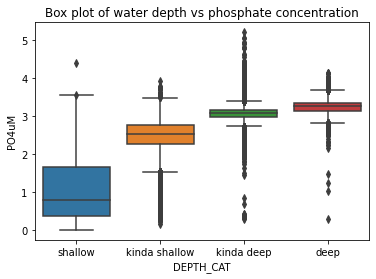

In [ ]:
# Plot phosphate concentration vs water depth to visualize relationship.
# The graph shows an increasing relationship between depth and phosphate concentration.
%matplotlib inline

sns.boxplot(x="DEPTH_CAT", y="PO4uM", data=sub2)
plt.xlabel("DEPTH_CAT")
plt.ylabel("PO4uM")
plt.title("Box plot of water depth vs phosphate concentration");

# ANOVA

In [ ]:
# Perform ANOVA variance test between water depth and phosphate concentration.
# R-squared: 0.65
# F-statistic: 2.411e+05
# p-value: 0.0
# p-value is < 0.05, so we reject the null hypothesis.
model1 = smf.ols(formula='PO4uM ~ C(DEPTH_CAT)', data=sub2).fit()
print (model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  PO4uM   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                 2.411e+05
Date:                Tue, 04 Jan 2022   Prob (F-statistic):               0.00
Time:                        10:12:37   Log-Likelihood:            -3.5220e+05
No. Observations:              388871   AIC:                         7.044e+05
Df Residuals:                  388867   BIC:                         7.044e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [ ]:
print ('means for PO4uM by depth category:')
m2 = sub2.groupby('DEPTH_CAT').mean()
print (m2)

means for PO4uM by depth category:
                 PO4uM
DEPTH_CAT             
shallow       1.021587
kinda shallow 2.490355
kinda deep    3.070342
deep          3.249309


In [ ]:
# Perform Tukey post hoc test to analyze differences between categories.
# New p-value: 0.05 / 6 = 0.0083
mc1 = multi.MultiComparison(sub2['PO4uM'], sub2['DEPTH_CAT'])
res1 = mc1.tukeyhsd()
print(res1.summary())

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
    group1        group2    meandiff p-adj  lower   upper  reject
-----------------------------------------------------------------
         deep    kinda deep   -0.179 0.001 -0.1957 -0.1623   True
         deep kinda shallow   -0.759 0.001 -0.7746 -0.7433   True
         deep       shallow  -2.2277 0.001 -2.2427 -2.2128   True
   kinda deep kinda shallow    -0.58 0.001 -0.5897 -0.5703   True
   kinda deep       shallow  -2.0488 0.001 -2.0573 -2.0402   True
kinda shallow       shallow  -1.4688 0.001  -1.475 -1.4625   True
-----------------------------------------------------------------


In [ ]:
print ('means for PO4uM by depth category:')
m2 = sub2.groupby('DEPTH_CAT').std()
print (m2)

means for PO4uM by depth category:
                 PO4uM
DEPTH_CAT             
shallow       0.696238
kinda shallow 0.357878
kinda deep    0.194876
deep          0.197763
